## Часть 1. Линейная регрессия

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
from sklearn.datasets import load_boston
boston = load_boston()

from sklearn.model_selection import train_test_split

- CRIM — уровень преступности на душу населения;
- ZN — процент земли, застроенной жилыми домами (только для участков площадью свыше 25000 кв. - футов);
- INDUS — процент деловой застройки;
- CHAS — 1, если участок граничит с рекой; 0 в противном случае (бинарный признак);
- NOX — концентрация оксида азота, деленная на 10^7;
- RM — среднее число комнат (по всем домам рассматриваемого участка);
- AGE — процент домов, построенных до 1940 г. и занимаемых владельцами;
- DIS — взвешенное расстояние до 5 деловых центров Бостона;
- RAD — индекс удаленности до радиальных магистралей;
- TAX — величина налога в $10000;

- PTRATIO — количество учащихся, приходящихся на одного учителя (по городу);
- B = 1000(AA − 0.63)^2, где AA — доля афро-американцев;
- LSTAT — процент жителей с низким социальным статусом. Признак CHAS — бинарный, остальные — количественные. Выходом является переменная MEDV, равная медианному значению цены строения (по всем домам участка) в $1000.

### Преобразуем данные и удалим выбросы

In [2]:
data = pd.DataFrame(data=boston.data, columns=boston.feature_names)
data["MEDV"] = boston.target
# data = data.drop(data[(data.MEDV == 50) | (data.RM == 8.78) | (data.RM < 4)].index)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [156]:
X = data["RM"]
y = data["MEDV"]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=18)

## Модель

In [393]:
class GDRegressor:

    def __init__(self, alpha=0.01, n_iter=100, progress=True):
        self.alpha = alpha
        self.n_iter = n_iter
        self.disable = not progress

    def fit(self, X, y):
        th0, th1 = 0, 0
        th1_history, th0_history, self.loss_history = [], [], []
        X = list(X)
        y = list(y)
        
        for i in range(self.n_iter):
            J = 0
            err0, err1 = 0, 0
            
            for x in range(len(X)):
                err1 += ((th0 + th1*X[x] - y[x])*X[x])
            for x in range(len(X)):
                err0 += (th0 + th1*X[x] - y[x])
                J += ((th0 + th1*X[x] - y[x])**2)/(2*len(y))

            grad0 = err0*self.alpha/len(y)
            grad1 = err1*self.alpha/len(y)
            th0 -= grad0
            th1 -= grad1

            th0_history.append(th0)
            th1_history.append(th1)
            self.loss_history.append(J)
            
        self.intercept_history = th0_history
        self.coef_history = th1_history
        self.intercept_ = th0
        self.coef_ = th1

    def predict(self, X_test):
        self.predictions = []
        X_test = list(X_test)
        for i in range(len(X_test)):
            self.predictions.append(self.coef_*X_test[i]+self.intercept_)

        return self.predictions

In [84]:
model = GDRegressor(alpha=0.04, n_iter=100)
%time model.fit(X_train, Y_train)

CPU times: user 45.6 ms, sys: 175 µs, total: 45.8 ms
Wall time: 44.8 ms


In [85]:
model.coef_, model.intercept_

(3.806808761118752, -1.0726158227418863)

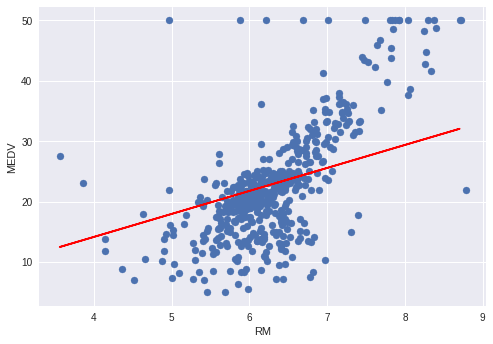

In [86]:
plt.scatter(data["RM"], data["MEDV"])
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.plot(X_train, model.coef_ * X_train + model.intercept_, "r");

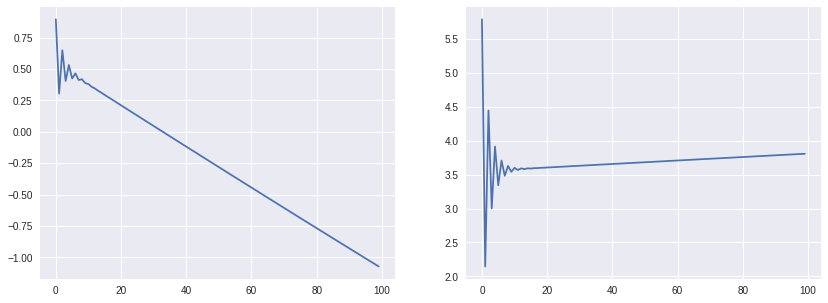

In [87]:
def plot_coeffs(model):
    plt.figure(figsize=(14, 5))
    plt.subplot(121)
    plt.plot(list(range(model.n_iter)), model.intercept_history)
    plt.subplot(122)
    plt.plot(list(range(model.n_iter)), model.coef_history);
plot_coeffs(model)

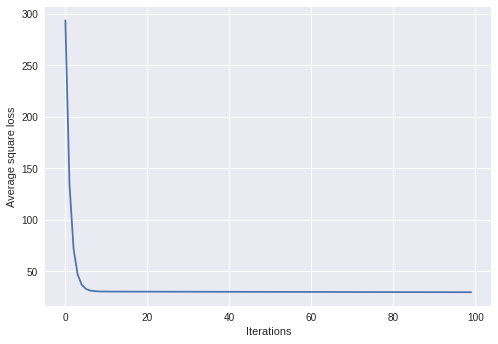

In [88]:
def plot_loss_function(model):
    plt.xlabel("Iterations")
    plt.ylabel("Average square loss")
    plt.plot(np.arange(model.n_iter), model.loss_history);
plot_loss_function(model)

## R_squared and RMSE

In [79]:
def rmse(y_hat, y):
    numerator = 0
    
    for i in range(len(list(y_hat))):
        numerator += (list(y)[i]-list(y_hat)[i])**2
    
    return (numerator/len(y))**0.5

In [80]:
def r_squared(y_hat, y):
    numerator, denominator = 0, 0
    
    for i in range(len(list(y))):
        numerator += (list(y)[i] - list(y_hat)[i])**2
        denominator += (list(y)[i]-np.mean(y))**2
        
    return 1 - numerator/denominator

In [89]:
Y_pred = model.predict(X_test)
rmse(Y_pred, Y_test), r_squared(Y_pred, Y_test)

(7.309555219631523, 0.35285913259014934)

### Подберем параметры модели и уменьшим среднеквадратичную ошибку до 6.45, а коэффициент детерминации до 0.49

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=18)
model = GDRegressor(alpha=0.02, n_iter=10000)
%time model.fit(X_train, Y_train)

CPU times: user 2.27 s, sys: 0 ns, total: 2.27 s
Wall time: 2.27 s


In [97]:
Y_pred = model.predict(X_test)
rmse(Y_pred, Y_test), r_squared(Y_pred, Y_test)

(6.452257194794876, 0.49575655036960986)

### Удалим выбросы

In [294]:
# data_cl = data.drop(data[(data.MEDV == 50) | (data.RM == 8.78) | (data.RM < 4)].index)
# X_cl = data_cl["RM"]
# y_cl = data_cl["MEDV"]
X_filtered = data[(data["MEDV"] < 50)]["RM"]
y_filtered = data[(data["MEDV"] < 50)]["MEDV"]
X_train, X_test, Y_train, Y_test = train_test_split(X_filtered, y_filtered, test_size=0.33, random_state=18)

In [118]:
model = GDRegressor(alpha=0.04, n_iter=10000)
%time model.fit(X_train, Y_train)

CPU times: user 2.2 s, sys: 7.35 ms, total: 2.21 s
Wall time: 2.21 s


In [119]:
Y_pred = model.predict(X_test)
rmse(Y_pred, Y_test), r_squared(Y_pred, Y_test)

(5.65586397329336, 0.5520077722064607)

## Нормализация

In [120]:
def z_scaler(feature):
    z = []
    for i in range(len(list(feature))):
        z.append((list(feature)[i]-np.mean(feature))/np.std(feature))
    return z

In [121]:
def min_max(feature):
    min_max = []
    min_ = np.min(feature)
    max_ = np.max(feature)
    for i in range(len(list(feature))):
        min_max.append((list(feature)[i]-min_)/(max_-min_))
    return min_max

### Z-score

In [125]:
X_z_scaled = z_scaler(X_filtered)
y_z_scaled = z_scaler(y_filtered)

In [143]:
X_train_z_scaled, X_test_z_scaled, Y_train_z_scaled, Y_test_z_scaled =\
    train_test_split(X_z_scaled, y_z_scaled, test_size=0.33, random_state=18)
model = GDRegressor(alpha=0.02, n_iter=10000)
model.fit(X_train_z_scaled, Y_train_z_scaled)

In [145]:
Y_pred_z_scaled = model.predict(X_test_z_scaled)
rmse(Y_pred_z_scaled, Y_test_z_scaled), r_squared(Y_pred_z_scaled, Y_test_z_scaled)

(0.7184015724750941, 0.553778391683926)

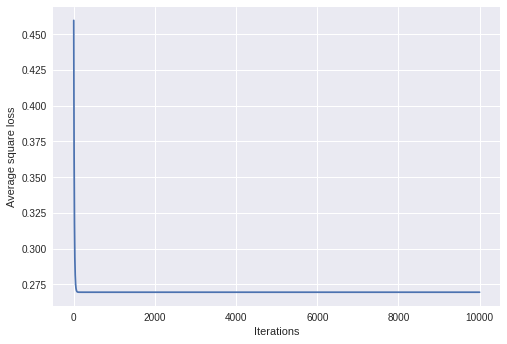

In [140]:
plt.xlabel("Iterations")
plt.ylabel("Average square loss")
plt.plot(np.arange(model.n_iter), model.loss_history);

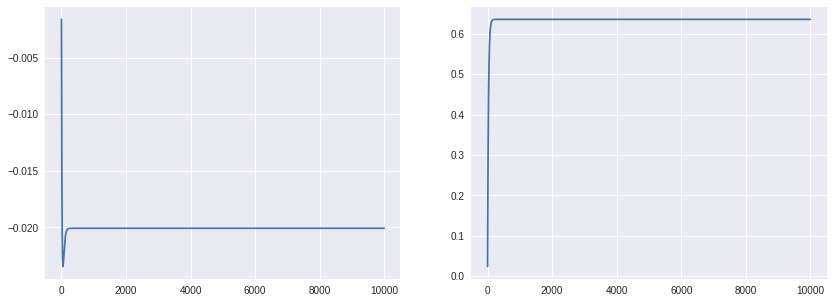

In [141]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(list(range(model.n_iter)), model.intercept_history)
plt.subplot(122)
plt.plot(list(range(model.n_iter)), model.coef_history);

### Min-max

In [153]:
X_minmax_scaled = min_max(X_filtered)
y_minmax_scaled = min_max(y_filtered)
X_train_minmax_scaled, X_test_minmax_scaled, Y_train_minmax_scaled, Y_test_minmax_scaled =\
    train_test_split(X_minmax_scaled, y_minmax_scaled, test_size=0.33, random_state=18)
model = GDRegressor(alpha=0.02, n_iter=10000)
model.fit(X_train_minmax_scaled, Y_train_minmax_scaled)
Y_pred_minmax_scaled = model.predict(X_test_minmax_scaled)
rmse(Y_pred_minmax_scaled, Y_test_minmax_scaled), r_squared(Y_pred_minmax_scaled, Y_test_minmax_scaled)

(0.1312176863360755, 0.5374000936392848)

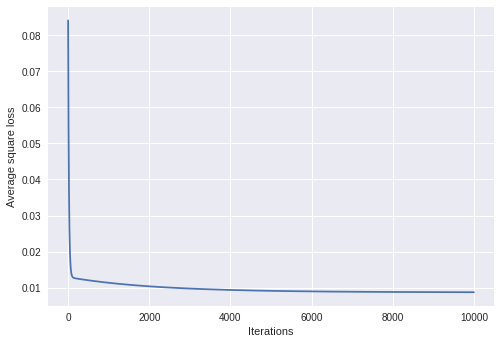

In [154]:
plt.xlabel("Iterations")
plt.ylabel("Average square loss")
plt.plot(np.arange(model.n_iter), model.loss_history);

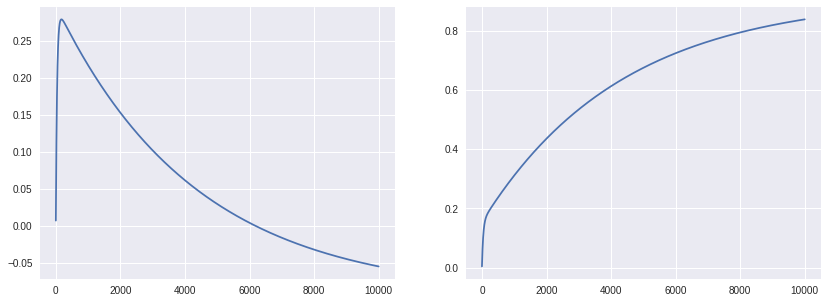

In [155]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(list(range(model.n_iter)), model.intercept_history)
plt.subplot(122)
plt.plot(list(range(model.n_iter)), model.coef_history);

- Z        (0.7184015724750941, 0.553778391683926)
- Min-max  (0.1312176863360755, 0.5374000936392848)

## sklearn

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [226]:
X_filtered = data[(data["MEDV"] < 50)][["RM"]]
y_filtered = data[(data["MEDV"] < 50)]["MEDV"]

In [3]:
# data_cl = data.drop(data[(data.MEDV == 50) | (data.RM == 8.78) | (data.RM < 4) | (data.MEDV == 5)].index)
X = data[["RM"]]
y = data["MEDV"]

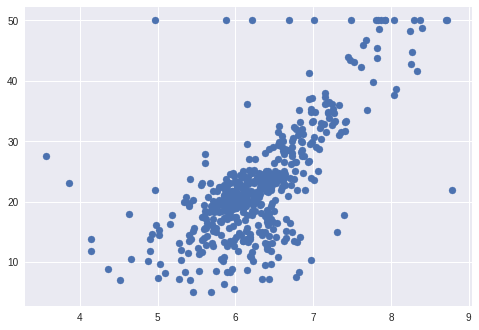

In [4]:
plt.scatter(data.RM, data.MEDV)

In [302]:
max_iter = 10000
eta0 = 0.0001
model = SGDRegressor(
    loss='squared_loss',
    learning_rate='constant',
    max_iter=max_iter,
    eta0=eta0,
    alpha=0.0004
)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.33, random_state = 18)
x_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)
Y_train = y_scaler.fit_transform(Y_train.values.reshape(-1, 1))
X_test = x_scaler.transform(X_test)
Y_test = y_scaler.transform(Y_test.values.reshape(-1, 1))

model.fit(X_train, Y_train.ravel())
Y_pred = model.predict(X_test)

In [278]:
model.coef_, model.intercept_

(array([0.55158193]), array([7.2572147e-05]))

In [279]:
mean_squared_error(Y_test, Y_pred), r2_score(Y_test, Y_pred)

(0.4877016863176912, 0.4962477372326971)

Независимо от параметров модели значения RMSE и коэффициента детерминации равны ~0.48 и ~0.49. Значение th1 колеблется в районе 0.55, значение th0 - меняется очень сильно от модели к модели (high variance). 

## Gradient check

In [330]:
def gradient_check(x, th, e=1e-7):
    th_plus = th + e                       
    th_minus = th - e                
    J_plus = np.dot(th_plus, x)                 
    J_minus = np.dot(th_minus, x)             
    gradapprox = (J_plus - J_minus) / (2*e)
    grad = x
    numerator = np.linalg.norm(grad - gradapprox)                  
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)   
    difference = numerator / denominator
    if difference < 1e-7:
        print("Correct")
    else:
        print("Incorrect")
    
    return difference

In [335]:
X_filtered = data[(data["MEDV"] < 50)][["RM"]]
y_filtered = data[(data["MEDV"] < 50)]["MEDV"]
X_train, X_test, Y_train, Y_test = train_test_split(X_filtered, y_filtered, test_size=0.33, random_state=18)

In [336]:
model = GDRegressor(alpha=0.04, n_iter=10000)
%time model.fit(X_train, Y_train)

CPU times: user 2.27 s, sys: 0 ns, total: 2.27 s
Wall time: 2.27 s


In [337]:
model.coef_, model.intercept_

(7.578992840686906, -25.85284418575019)

In [338]:
gradient_check(X_train, model.coef_)

Correct


1.8049929446370207e-09

In [339]:
gradient_check(X_train, model.intercept_)

Correct


7.54103550586197e-09

## Learning curves

In [343]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

In [356]:
len(y_filtered)

490

In [345]:
train_sizes = [1, 25, 75, 150, 250, 328]

In [358]:
X = data[["RM"]]
y = data["MEDV"]

In [359]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.33, random_state = 18)
x_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)
Y_train = y_scaler.fit_transform(Y_train.values.reshape(-1, 1))
X_test = x_scaler.transform(X_test)
Y_test = y_scaler.transform(Y_test.values.reshape(-1, 1))

(-100.0, 200.0)

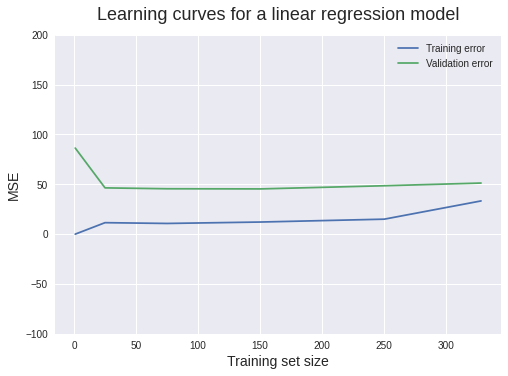

In [378]:
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = LinearRegression(),
    X = X,
    y = y,
    train_sizes = train_sizes,
    cv = 7, # splitting data into 490/7 = 70 chunks
    scoring = 'neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(-100,200)

## Mini-batch GD

In [3]:
class MBGDRegressor:

    def __init__(self, alpha=0.04, n_epoch=5, m=200, size=20, progress=True):
        self.alpha = alpha
        self.n_epoch = n_epoch
        self.m = m
        self.size = size
        self.disable = not progress

    def fit(self, X, y):
        th0, th1 = 0, 0
        th1_history, th0_history, self.loss_history = [], [], []
        X = list(X)
        y = list(y)
        
        for i in range(self.n_epoch):
            for k in range(0, self.m, self.size):
                X_o = X[k:k+self.size]
                y_o = y[k:k+self.size]
        
                J = 0
                err0, err1 = 0, 0
            
                for x in range(len(y_o)):
                    err1 += (th0 + th1*X_o[x] - y_o[x])*X_o[x]
                for x in range(len(y_o)):
                    err0 += th0 + th1*X[x] - y[x]
                    J += ((th0 + th1*X_o[x] - y_o[x])**2)/(2*len(y))

                grad0 = err0*self.alpha/len(y)
                grad1 = err1*self.alpha/len(y)
                th0 -= grad0
                th1 -= grad1

            th0_history.append(th0)
            th1_history.append(th1)
            self.loss_history.append(J)
            
        self.intercept_history = th0_history
        self.coef_history = th1_history
        self.intercept_ = th0
        self.coef_ = th1

    def predict(self, X_test):
        self.predictions = []
        X_test = list(X_test)
        for i in range(len(X_test)):
            self.predictions.append(self.coef_*X_test[i]+self.intercept_)

        return self.predictions

In [4]:
X = data["RM"]
y = data["MEDV"]

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.33, random_state = 18)

In [6]:
model = MBGDRegressor(alpha=0.04)
%time model.fit(X_train, Y_train)

CPU times: user 2.45 ms, sys: 0 ns, total: 2.45 ms
Wall time: 2.36 ms


In [7]:
model.coef_, model.intercept_

(3.628712051528925, 0.6155747527986657)

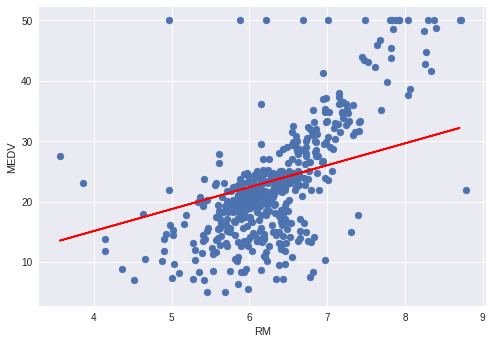

In [8]:
plt.scatter(data["RM"], data["MEDV"])
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.plot(X_train, model.coef_ * X_train + model.intercept_, "r");